# data.csv

```
SELECT period.name, internship.type, skill_entry_with_workflow.id, skill_main.code, skill_descriptor.code, skill_situation_family.code ,skill_entry_with_workflow.workflow_state, skill_entry_with_workflow.created_at, skill_entry_with_workflow.updated_at
FROM skill_entry_with_workflow
LEFT JOIN skill_descriptor ON skill_entry_with_workflow.skill_descriptor_id = skill_descriptor.id
LEFT JOIN skill_main ON skill_descriptor.skill_main_id = skill_main.id
LEFT JOIN skill_container_with_situation_family ON skill_entry_with_workflow.skill_container_id = skill_container_with_situation_family.id
LEFT JOIN skill_situation_family ON skill_container_with_situation_family.situation_family_id = skill_situation_family.id
LEFT JOIN scoreboard_entry_abstract ON skill_container_with_situation_family.id = scoreboard_entry_abstract.skill_container_id
LEFT JOIN internship_assignment ON scoreboard_entry_abstract.internship_assignment_id = internship_assignment.id
LEFT JOIN period ON internship_assignment.period_id = period.id
LEFT JOIN internship ON internship_assignment.internship_id = internship.id

WHERE (period.name = "20222" OR period.name = "20231" OR period.name = "20232" OR period.name = "20241") AND internship.type = "internshipPractical"
```

In [27]:
import pandas as pd
import numpy as np
from fanalysis.ca import CA
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('data/data.csv')
display(data)

,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at
0,20232,internshipPractical,018fb9a9-679e-7a4a-b7aa-39c1aa113192,C1,C1NnD5,FS02,certified,2024-05-27 12:47:18,2024-07-01 11:38:05
1,20232,internshipPractical,018fb9a9-b74f-7747-b952-19298903556b,C3,C3NnD3,FS02,certified,2024-05-27 12:47:38,2024-07-01 11:38:30
2,20232,internshipPractical,018fb9ae-2e81-7832-b25a-224b59a31ad0,C1,C1NnD1,FS01,certified,2024-05-27 12:52:31,2024-07-01 11:38:47
3,20232,internshipPractical,018fb9ae-6869-76b8-a0cc-6b25e384dbf6,C1,C1NnD6,FS01,certified,2024-05-27 12:52:46,2024-07-01 11:38:59
4,20232,internshipPractical,018fc3ff-7f2e-7a8e-b760-aa27fd7cdb33,C1,C1NiD6,FS03,certified,2024-05-29 12:57:32,2024-07-01 11:39:37
...,...,...,...,...,...,...,...,...,...
81634,20231,internshipPractical,1ee7d757-ded1-66d2-81c2-c3fe946aa90b,C4,C4NcD3,FS02,in_progress,2023-11-07 14:56:47,2023-11-07 14:56:47
81635,20231,internshipPractical,1ee7d759-4478-6548-87da-032039870491,C5,C5NcD2,FS09,in_progress,2023-11-07 14:57:24,2023-11-07 14:57:24
81636,20231,internshipPractical,1ee7d75a-668d-6754-a53d-932a1d23546b,C5,C5NcD6,FS01,in_progress,2023-11-07 14:57:55,2023-11-07 14:57:55
81637,20231,internshipPractical,1ee7d75c-e927-6758-b419-bf1c633e8370,C3,C3NcD1,FS10,in_progress,2023-11-07 14:59:02,2023-11-07 14:59:02


In [29]:
data["skill-level"] = data["code.1"].apply(lambda x: x[0:4])
display(data)

,name,type,id,code,code.1,code.2,workflow_state,created_at,updated_at,skill-level
0,20232,internshipPractical,018fb9a9-679e-7a4a-b7aa-39c1aa113192,C1,C1NnD5,FS02,certified,2024-05-27 12:47:18,2024-07-01 11:38:05,C1Nn
1,20232,internshipPractical,018fb9a9-b74f-7747-b952-19298903556b,C3,C3NnD3,FS02,certified,2024-05-27 12:47:38,2024-07-01 11:38:30,C3Nn
2,20232,internshipPractical,018fb9ae-2e81-7832-b25a-224b59a31ad0,C1,C1NnD1,FS01,certified,2024-05-27 12:52:31,2024-07-01 11:38:47,C1Nn
3,20232,internshipPractical,018fb9ae-6869-76b8-a0cc-6b25e384dbf6,C1,C1NnD6,FS01,certified,2024-05-27 12:52:46,2024-07-01 11:38:59,C1Nn
4,20232,internshipPractical,018fc3ff-7f2e-7a8e-b760-aa27fd7cdb33,C1,C1NiD6,FS03,certified,2024-05-29 12:57:32,2024-07-01 11:39:37,C1Ni
...,...,...,...,...,...,...,...,...,...,...
81634,20231,internshipPractical,1ee7d757-ded1-66d2-81c2-c3fe946aa90b,C4,C4NcD3,FS02,in_progress,2023-11-07 14:56:47,2023-11-07 14:56:47,C4Nc
81635,20231,internshipPractical,1ee7d759-4478-6548-87da-032039870491,C5,C5NcD2,FS09,in_progress,2023-11-07 14:57:24,2023-11-07 14:57:24,C5Nc
81636,20231,internshipPractical,1ee7d75a-668d-6754-a53d-932a1d23546b,C5,C5NcD6,FS01,in_progress,2023-11-07 14:57:55,2023-11-07 14:57:55,C5Nc
81637,20231,internshipPractical,1ee7d75c-e927-6758-b419-bf1c633e8370,C3,C3NcD1,FS10,in_progress,2023-11-07 14:59:02,2023-11-07 14:59:02,C3Nc


In [30]:
# data_pt = pd.pivot_table(data, values="name", index=[data['id']], columns=data['record'], aggfunc="count", fill_value=0, dropna=False)


data_pt = pd.pivot_table(data, values="id", index=[data['skill-level']], columns=data['code.2'], aggfunc="count")
display(data_pt)

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
skill-level,,,,,,,,,,,
C1Nc,645,530,482,507,265,278,414,158,503,189,156
C1Ni,1063,1006,730,693,298,303,447,162,561,299,219
C1Nn,1789,2095,1376,1308,435,287,476,233,636,446,284
C2NI,179,182,127,99,46,51,92,28,94,54,22
C2Nc,783,718,629,538,285,270,423,116,442,196,186
C2Ni,606,630,486,327,186,164,246,48,313,117,84
C2Nn,539,580,397,310,155,85,163,115,200,188,111
C3Nc,533,411,267,458,253,71,110,127,199,142,142
C3Ni,807,740,402,800,387,123,161,183,296,166,218


In [31]:
col_names = list(data_pt.columns)[0:]
row_names = list(data_pt.index)

In [32]:
X = data_pt[col_names].values 

In [33]:
row_sum = np.sum(X, axis=1)
row_profile = X / row_sum[:, np.newaxis]

print("Profil ligne:")
display(pd.DataFrame(row_profile, index=row_names, columns=col_names))

Profil ligne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1Nc,0.156288,0.128423,0.116792,0.122850,0.064211,0.067361,0.100315,0.038284,0.121880,0.045796,0.037800
C1Ni,0.183878,0.174018,0.126276,0.119875,0.051548,0.052413,0.077322,0.028023,0.097042,0.051721,0.037883
C1Nn,0.191030,0.223705,0.146930,0.139669,0.046450,0.030646,0.050828,0.024880,0.067912,0.047624,0.030326
C2NI,0.183778,0.186858,0.130390,0.101643,0.047228,0.052361,0.094456,0.028747,0.096509,0.055441,0.022587
C2Nc,0.170737,0.156563,0.137157,0.117314,0.062146,0.058875,0.092237,0.025294,0.096380,0.042739,0.040558
C2Ni,0.188962,0.196445,0.151543,0.101964,0.057998,0.051138,0.076707,0.014967,0.097599,0.036483,0.026193
C2Nn,0.189588,0.204010,0.139641,0.109040,0.054520,0.029898,0.057334,0.040450,0.070348,0.066127,0.039043
C3Nc,0.196461,0.151493,0.098415,0.168817,0.093255,0.026170,0.040546,0.046812,0.073351,0.052341,0.052341
C3Ni,0.188419,0.172776,0.093859,0.186785,0.090357,0.028718,0.037590,0.042727,0.069110,0.038758,0.050899
C3Nn,0.236509,0.203000,0.101305,0.170076,0.078706,0.015196,0.026106,0.035457,0.053380,0.045198,0.035067


In [34]:
col_sum = np.sum(X, axis=0)
col_profile = X / col_sum[np.newaxis, :]

print("Profil colonne:")
display(pd.DataFrame(col_profile, index=row_names, columns=col_names))

Profil colonne:


,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
C1Nc,0.042991,0.033314,0.039139,0.045696,0.053085,0.102470,0.090650,0.063505,0.081339,0.053209,0.055300
C1Ni,0.070852,0.063235,0.059277,0.062461,0.059696,0.111684,0.097876,0.065113,0.090718,0.084178,0.077632
C1Nn,0.119243,0.131686,0.111734,0.117891,0.087139,0.105787,0.104226,0.093650,0.102846,0.125563,0.100674
C2NI,0.011931,0.011440,0.010313,0.008923,0.009215,0.018798,0.020145,0.011254,0.015201,0.015203,0.007799
C2Nc,0.052190,0.045132,0.051076,0.048490,0.057091,0.099521,0.092621,0.046624,0.071475,0.055180,0.065934
C2Ni,0.040392,0.039600,0.039464,0.029473,0.037260,0.060450,0.053865,0.019293,0.050614,0.032939,0.029777
C2Nn,0.035926,0.036457,0.032237,0.027941,0.031050,0.031331,0.035691,0.046222,0.032342,0.052928,0.039348
C3Nc,0.035526,0.025834,0.021681,0.041280,0.050681,0.026170,0.024086,0.051045,0.032180,0.039977,0.050337
C3Ni,0.053789,0.046515,0.032643,0.072105,0.077524,0.045337,0.035253,0.073553,0.047865,0.046734,0.077278
C3Nn,0.080917,0.065498,0.042225,0.078684,0.080929,0.028750,0.029341,0.073151,0.044308,0.065315,0.063807


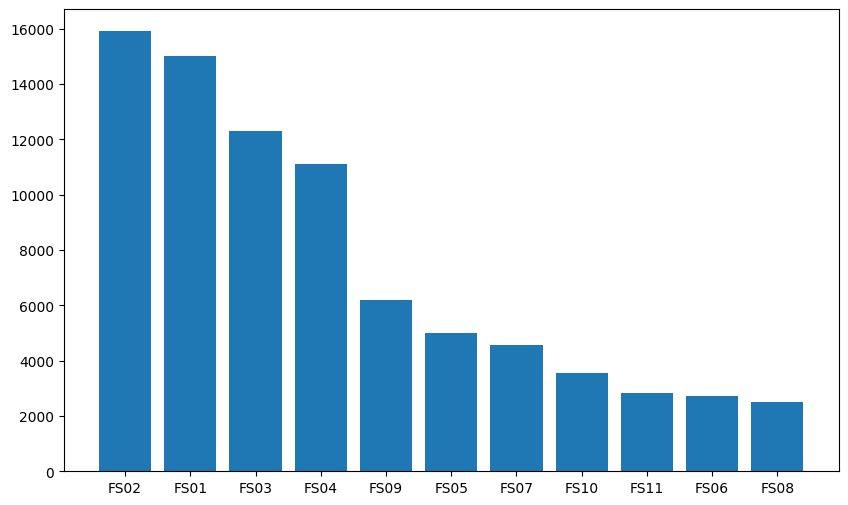

In [35]:
total_FS = data_pt[col_names].sum()

prop_FS = total_FS
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

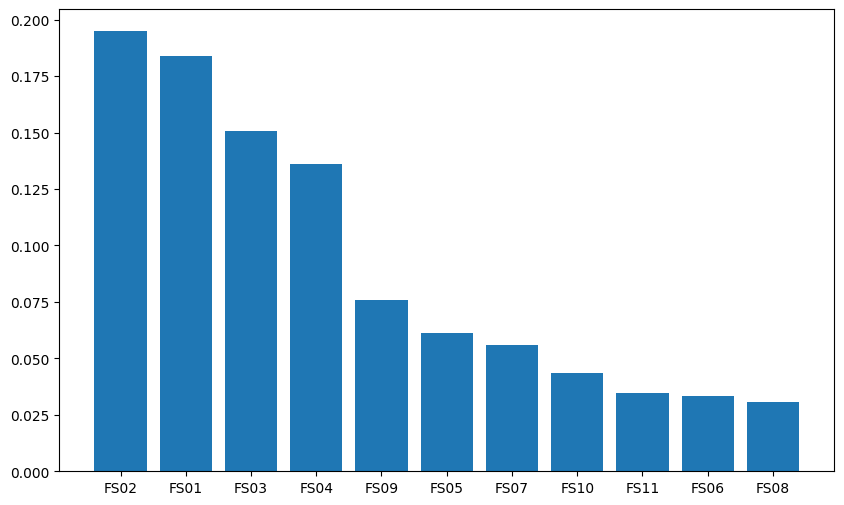

In [36]:
total_skill = data_pt[col_names].sum()

prop_FS = total_FS / total_FS.sum()
prop_FS = prop_FS.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(prop_FS.index, prop_FS)

plt.show()

In [37]:
data_pt

code.2,FS01,FS02,FS03,FS04,FS05,FS06,FS07,FS08,FS09,FS10,FS11
skill-level,,,,,,,,,,,
C1Nc,645,530,482,507,265,278,414,158,503,189,156
C1Ni,1063,1006,730,693,298,303,447,162,561,299,219
C1Nn,1789,2095,1376,1308,435,287,476,233,636,446,284
C2NI,179,182,127,99,46,51,92,28,94,54,22
C2Nc,783,718,629,538,285,270,423,116,442,196,186
C2Ni,606,630,486,327,186,164,246,48,313,117,84
C2Nn,539,580,397,310,155,85,163,115,200,188,111
C3Nc,533,411,267,458,253,71,110,127,199,142,142
C3Ni,807,740,402,800,387,123,161,183,296,166,218


In [38]:
my_ca = CA(row_labels=data_pt.index.values, col_labels=data_pt.columns.values,stats=True)

In [39]:
my_ca.fit(data_pt.values)


CA(col_labels=array(['FS01', 'FS02', 'FS03', 'FS04', 'FS05', 'FS06', 'FS07', 'FS08',
       'FS09', 'FS10', 'FS11'], dtype=object),
   row_labels=array(['C1Nc', 'C1Ni', 'C1Nn', 'C2NI', 'C2Nc', 'C2Ni', 'C2Nn', 'C3Nc',
       'C3Ni', 'C3Nn', 'C4Nc', 'C4Ni', 'C4Nn', 'C5Nc', 'C5Ni', 'C5Nn',
       'C6Nc', 'C6Ni', 'C6Nn'], dtype=object))

In [40]:
my_ca.eig_

array([[3.06819646e-02, 1.55532912e-02, 7.75978391e-03, 1.90808634e-03,
        1.38124909e-03, 9.50126013e-04, 3.44540370e-04, 2.65027971e-04,
        1.43773984e-04, 4.92933816e-05],
       [5.19706176e+01, 2.63449280e+01, 1.31439028e+01, 3.23201028e+00,
        2.33962749e+00, 1.60937007e+00, 5.83599388e-01, 4.48917384e-01,
        2.43531431e-01, 8.34955491e-02],
       [5.19706176e+01, 7.83155456e+01, 9.14594484e+01, 9.46914587e+01,
        9.70310862e+01, 9.86404562e+01, 9.92240556e+01, 9.96729730e+01,
        9.99165045e+01, 1.00000000e+02]])

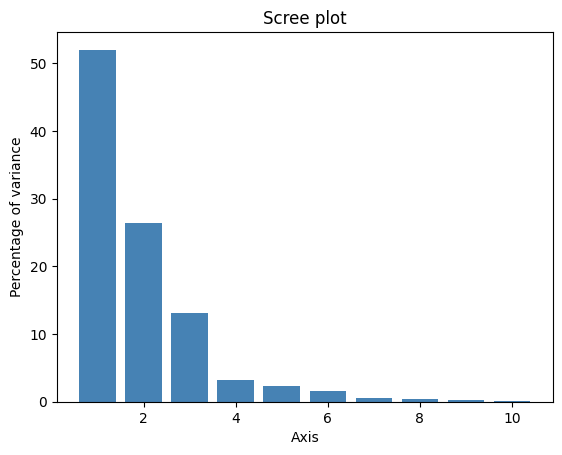

In [41]:
# Graphique des valeurs propres
my_ca.plot_eigenvalues(type="percentage")

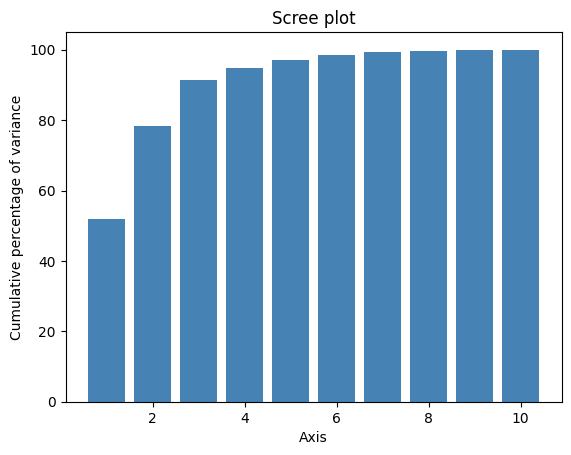

In [42]:
my_ca.plot_eigenvalues(type="cumulative")


Premier axe factoriel


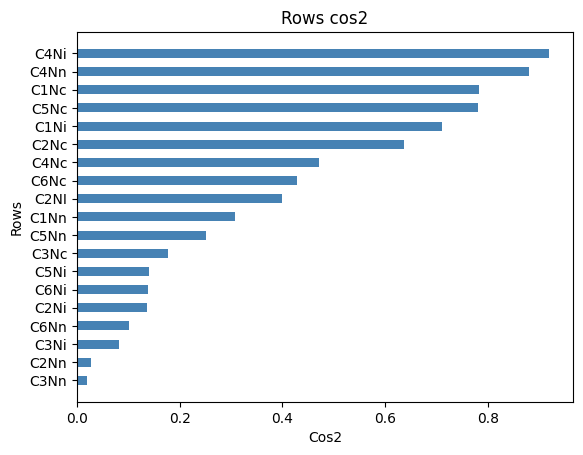

Second axe factoriel


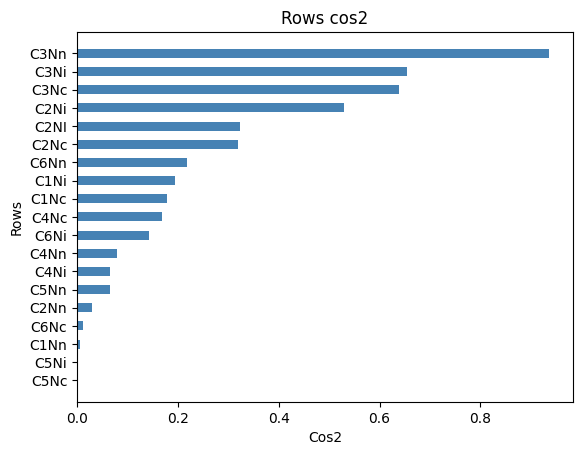

In [43]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
print("Premier axe factoriel")
my_ca.plot_row_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_row_cos2(num_axis=2)

Premier axe factoriel


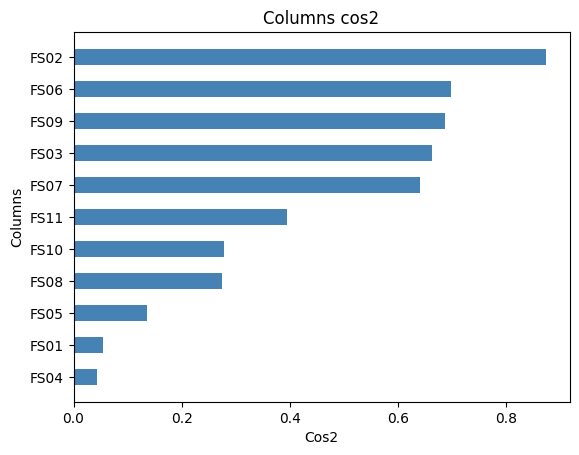

Second axe factoriel


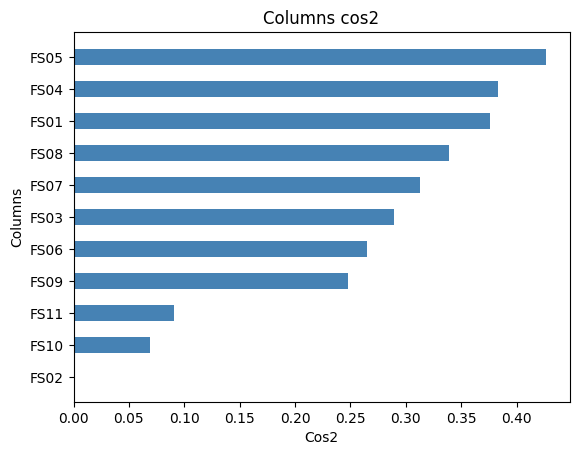

In [44]:
#### Profil colonne (les Candidats)

print("Premier axe factoriel")
my_ca.plot_col_cos2(num_axis=1)
print("Second axe factoriel")
my_ca.plot_col_cos2(num_axis=2)

Premier axe


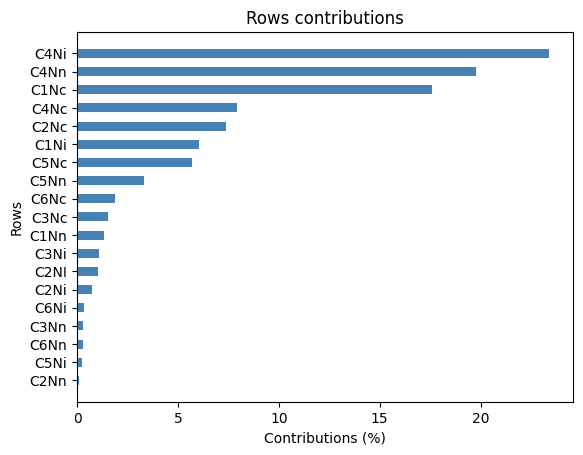

Second axe


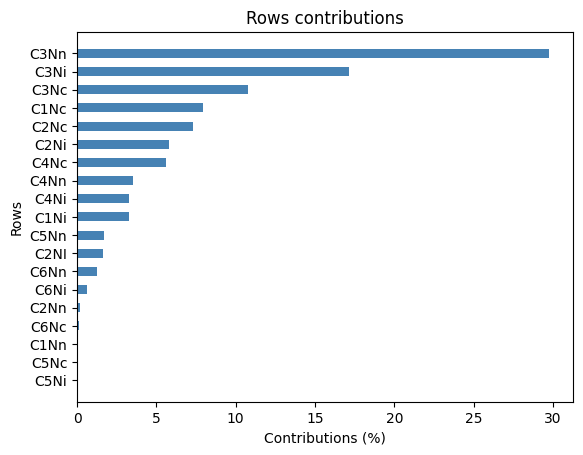

In [45]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_row_contrib(num_axis=1)
print("Second axe")
my_ca.plot_row_contrib(num_axis=2)

Premier axe


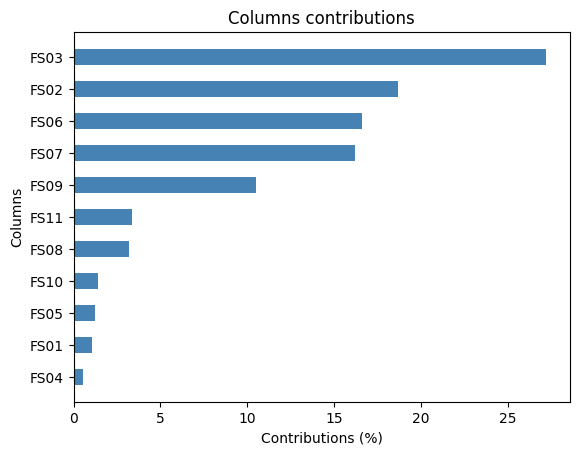

Second axe


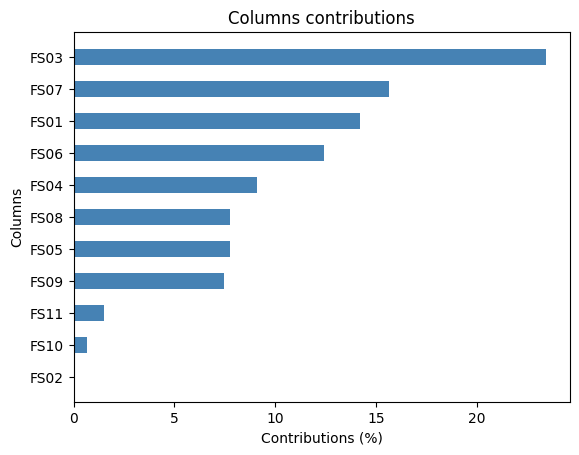

In [46]:
# Analyse  du premier plan factoriel - les départements
print("Premier axe")
my_ca.plot_col_contrib(num_axis=1)
print("Second axe")
my_ca.plot_col_contrib(num_axis=2)

In [47]:
info_skill=my_ca.row_topandas()
info_skill

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4,row_coord_dim5,row_coord_dim6,row_coord_dim7,row_coord_dim8,row_coord_dim9,row_coord_dim10,...,row_cos2_dim1,row_cos2_dim2,row_cos2_dim3,row_cos2_dim4,row_cos2_dim5,row_cos2_dim6,row_cos2_dim7,row_cos2_dim8,row_cos2_dim9,row_cos2_dim10
C1Nc,0.326859,-0.156223,-0.054400,-0.008862,-0.011242,-0.034574,0.025373,0.019227,0.001843,0.003968,...,0.781917,0.178619,0.021659,0.000575,0.000925,8.748627e-03,0.004712,0.002706,0.000025,0.000115
C1Ni,0.162023,-0.084670,0.038582,0.006883,-0.027001,0.033523,0.008824,0.003497,0.001253,-0.005224,...,0.710880,0.194132,0.040310,0.001283,0.019742,3.043115e-02,0.002109,0.000331,0.000042,0.000739
C1Nn,-0.059935,0.007617,0.058273,0.017121,-0.056500,0.030620,-0.000252,0.014539,0.002227,0.004521,...,0.306874,0.004957,0.290086,0.025041,0.272711,8.009745e-02,0.000005,0.018059,0.000424,0.001746
C2NI,0.161779,-0.145817,0.111597,-0.025841,-0.057342,-0.030324,0.016718,-0.005513,-0.019857,0.013207,...,0.398709,0.323912,0.189723,0.010172,0.050091,1.400826e-02,0.004258,0.000463,0.006007,0.002657
C2Nc,0.200518,-0.142015,-0.007561,0.030210,0.005574,-0.007213,-0.032075,-0.019398,-0.017521,-0.003191,...,0.636688,0.319366,0.000905,0.014452,0.000492,8.239089e-04,0.016292,0.005958,0.004861,0.000161
C2Ni,0.077088,-0.151846,0.079664,0.071243,0.015882,-0.027038,0.022739,-0.031734,0.021466,-0.010965,...,0.136579,0.529927,0.145858,0.116653,0.005797,1.680233e-02,0.011884,0.023146,0.010591,0.002763
C2Nn,0.025774,0.026506,0.066772,-0.113175,-0.028863,0.050805,-0.002033,-0.041924,-0.004718,-0.001386,...,0.027871,0.029477,0.187064,0.537406,0.034954,1.082957e-01,0.000173,0.073745,0.000934,0.000081
C3Nc,0.118372,0.224806,-0.108751,-0.018532,0.028325,0.018046,0.014809,-0.023878,-0.021384,-0.003195,...,0.177132,0.638871,0.149508,0.004342,0.010142,4.116860e-03,0.002772,0.007207,0.005780,0.000129
C3Ni,0.079254,0.225196,-0.132969,0.048674,-0.013973,-0.000021,-0.005152,-0.006917,0.013803,0.006306,...,0.081002,0.653990,0.228009,0.030553,0.002518,5.706850e-09,0.000342,0.000617,0.002457,0.000513
C3Nn,-0.038510,0.271336,0.027622,0.048270,-0.005070,-0.005521,0.014131,0.003543,-0.005954,-0.008306,...,0.018875,0.937015,0.009710,0.029654,0.000327,3.879952e-04,0.002541,0.000160,0.000451,0.000878


In [48]:
info_FS=my_ca.col_topandas()
info_FS

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4,col_coord_dim5,col_coord_dim6,col_coord_dim7,col_coord_dim8,col_coord_dim9,col_coord_dim10,...,col_cos2_dim1,col_cos2_dim2,col_cos2_dim3,col_cos2_dim4,col_cos2_dim5,col_cos2_dim6,col_cos2_dim7,col_cos2_dim8,col_cos2_dim9,col_cos2_dim10
FS01,0.041940,0.109548,0.128955,0.018419,0.033456,-0.000507,-0.004593,0.008565,-0.000038,-0.002656,...,0.055056,0.375616,0.520491,0.010619,0.035033,0.000008,0.000660,2.295911e-03,4.556993e-08,0.000221
FS02,-0.171530,-0.006042,0.046303,0.007783,-0.041845,-0.000544,-0.000234,-0.012343,0.011055,0.002888,...,0.873130,0.001083,0.063622,0.001798,0.051961,0.000009,0.000002,4.520766e-03,3.626878e-03,0.000248
FS03,-0.235204,-0.155343,-0.041753,-0.026092,0.038933,-0.001338,-0.004056,0.005177,-0.005081,-0.003618,...,0.662714,0.289082,0.020884,0.008156,0.018158,0.000021,0.000197,3.211154e-04,3.092212e-04,0.000157
FS04,-0.034655,0.102114,-0.111238,0.039904,-0.032580,-0.000312,0.000791,0.021270,-0.009841,0.001836,...,0.044140,0.383226,0.454765,0.058521,0.039011,0.000004,0.000023,1.662758e-02,3.559581e-03,0.000124
FS05,0.079499,0.140456,-0.115675,0.021763,0.039011,-0.053120,0.011870,-0.042675,-0.006964,-0.003276,...,0.136600,0.426390,0.289207,0.010237,0.032893,0.060987,0.003045,3.936105e-02,1.048202e-03,0.000232
FS06,0.391836,-0.241185,-0.033885,0.050452,-0.057677,0.001236,-0.014082,-0.000249,0.011880,-0.027099,...,0.698520,0.264649,0.005224,0.011580,0.015135,0.000007,0.000902,2.814477e-07,6.420872e-04,0.003341
FS07,0.298326,-0.208580,0.058319,-0.007553,-0.015213,-0.039610,-0.030237,-0.003200,-0.016182,0.014689,...,0.639517,0.312620,0.024440,0.000410,0.001663,0.011274,0.006570,7.360341e-05,1.881629e-03,0.001550
FS08,0.179464,0.199103,-0.089389,-0.180693,-0.017182,-0.054424,-0.012035,0.022233,0.025126,-0.001799,...,0.275227,0.338761,0.068282,0.279011,0.002523,0.025311,0.001238,4.224104e-03,5.395008e-03,0.000028
FS09,0.206028,-0.123773,-0.024223,0.009744,0.026980,0.013859,0.046905,0.008435,0.013437,0.007259,...,0.686038,0.247599,0.009483,0.001534,0.011764,0.003104,0.035558,1.149979e-03,2.918048e-03,0.000852
FS10,0.098956,0.049450,0.075895,-0.095377,-0.049763,0.060965,0.027148,-0.015844,-0.030947,-0.005186,...,0.277716,0.069351,0.163358,0.257989,0.070231,0.105408,0.020903,7.119478e-03,2.716169e-02,0.000763


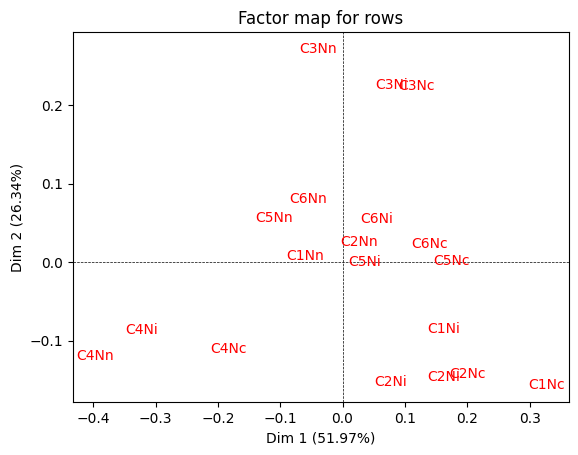

In [49]:
# Graphique des compétences (en ligne)
my_ca.mapping_row(num_x_axis=1,num_y_axis=2)

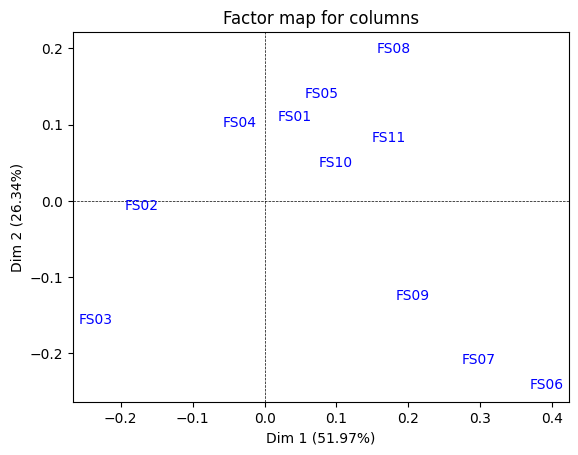

In [50]:
# Graphique des familles de situation (en colonne)
my_ca.mapping_col(num_x_axis=1,num_y_axis=2)

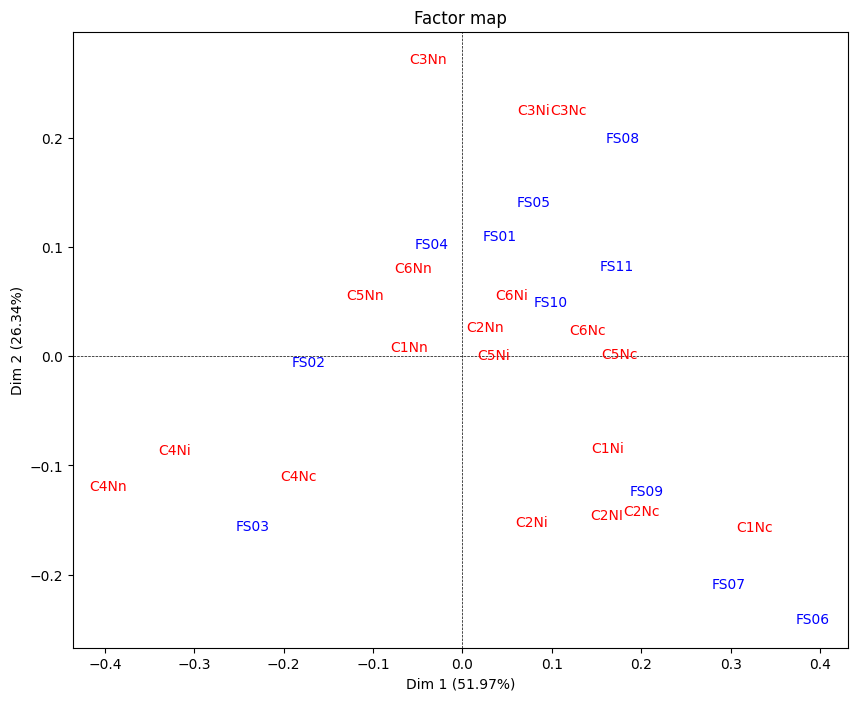

In [51]:
# Graphique profil ligne profil colonne

my_ca.mapping(1, 2, figsize=(10, 8))

Premier axe factoriel :  
On observe un regroupement entre les différents niveaux de la compétence C4 et les FS02 et FS03.  
A l'opposé de cela, on observe un regroupement entre la FS06, 07, 09 et la compétence "approche globale, complexité" + la compétence "communication" dans ses niveaux intermédiaire et compétents uniquement.  
La compétence au niveau novice semble davantage associées aux situations de soin aigue.  
La compétence C5 (continuité, suivi, coordination), au niveau compétent, est également mobilisée dans les FS06, 07 et 09.  
Je fais l'hypothèse que le 1er axe factoriel représente la montée en compétence (toutes les compténces novices sont à gauche des compétences intermédiaires, elle-même à gauche des compétences compétents) ou peut-être simplement le schéma de la maquette du DES? Il est important cependant de noter qu'il ne s'agit que des compétences proposées dans les RAQ, ce qui irait plutôt dans le sens de gommer l'effet maquette. 

Deuxième axe factoriel : 
Le second axe, plus délicat à interpréter (mauvaise représentation de toutes les familles de situation) semble opposer d'une part la compétence C3 (tous niveaux confondus) + FS01,04,05 et la compétence C2 dans son niveau intermédiaire (approche globale). 